<a href="https://colab.research.google.com/github/swampxx/DistanceBasedLearning/blob/master/DistanceBasedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [0]:
#!rm -r CMANN
#!git clone https://github.com/Orkun-tanik/CMANN.git

#Omniglot

*The Omniglot* dataset is a collection of 1623 hand drawn characters from 50 alphabets. For every character there are just 20 examples, each drawn by a different person at resolution 105x105.

In [2]:
#!unzip CMANN/images_evaluation.zip
#!unzip CMANN/images_background.zip

"""  Do not execute again!!  """

'  Do not execute again!!  '

In [0]:
# Imports

import os
import numpy as np
import matplotlib.image as mpimg

In [0]:
def to_origin(image):
    """
       Image: Black pixels labeled as True
        
       It moves the image towards the origin,
                returns new_image and black pixels coordinates array: (new_image,blacks)  
                
    """

    x,y = image.shape
    xshift = x
    yshift = y

    blacks = []

    for i in range(x):
        for j in range(y):
            if image[i][j] == True:
                blacks.append((i,j))
                if i<xshift:
                    xshift = i
                if j<yshift:
                    yshift = j

    new_image = np.zeros(shape=(x,y))

    for i in range(len(blacks)):
        (a,b) = blacks[i]
        blacks[i] = (a-xshift, b-yshift)
        new_image[a-xshift][b-yshift] = 1
    
    blacks = np.array(blacks)

    return (new_image, blacks)

In [0]:

data_path = ""
train_path = os.path.join(data_path,'images_background')
validation_path = os.path.join(data_path,'images_evaluation')



def load_images_from_directory(path):
    X=[]

    ## We load every alphabet seperately and append that to one tensor
    for alphabet in os.listdir(path):
        #print("loading alphabet: " + alphabet)
        alphabet_path = os.path.join(path,alphabet)
        
        ## Each character in alphabet is in a separate folder
        for letter in os.listdir(alphabet_path):
            #print(" + letter: " + letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
        
            
            if not os.path.isdir(letter_path):
                continue

            ## Read every image in this directory
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                image = mpimg.imread(image_path)
                #print(image)
                
                
                #TODO: recreate images with black pixels coordinate values
                
                
                ### Image preprocessing!
                #image = image/255
                #image = 1-image
                
                image = np.logical_not(image)
                #print("prepocessing image...")
                
                new_image, _ = to_origin(image)
                
                
                #print("done.")
                #print(image)           
                
                category_images.append(new_image)
            
            try:
                X.append(np.array(category_images))
            #edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
    
    X = np.array(X)

    return X




In [6]:
print("Loading training set")
#Xtrain = load_images_from_directory(train_path)
#print(Xtrain.shape)

print("Now loading evaluation set")
#Xval = load_images_from_directory(validation_path)
#print(Xval.shape)

Loading training set
Now loading evaluation set


In [0]:
#np.save('Xtrain.npy', Xtrain)
#np.save('Xval.npy', Xval)

In [0]:
#Xtrain = np.load("Xtrain.npy")
#Xval = np.load("Xval.npy")

In [9]:
"""#@title Example Image to be displayed { run: "auto" }
import matplotlib.pyplot as plt

character = 270 #@param {type:"integer"}
drawing = 16 #@param {type:"slider", min:0, max:19, step:1}
image_set = 'Xtrain' #@param ["Xval", "Xtrain"]

if (image_set == 'Xval'):
    imgplot = plt.imshow(Xval[character,drawing])
else:
    imgplot = plt.imshow(Xtrain[character,drawing])"""

'#@title Example Image to be displayed { run: "auto" }\nimport matplotlib.pyplot as plt\n\ncharacter = 270 #@param {type:"integer"}\ndrawing = 16 #@param {type:"slider", min:0, max:19, step:1}\nimage_set = \'Xtrain\' #@param ["Xval", "Xtrain"]\n\nif (image_set == \'Xval\'):\n    imgplot = plt.imshow(Xval[character,drawing])\nelse:\n    imgplot = plt.imshow(Xtrain[character,drawing])'

# Latin Images

In [10]:

latin_path = "Latin"
#latin_path_evaluation = "images_evaluation"

print("Loading Latin alphabet..")
latin = load_images_from_directory(latin_path)
print(latin.shape)

Loading Latin alphabet..
(26, 20, 105, 105)


In [11]:
#@title Latin Images { run: "auto" }
import matplotlib.pyplot as plt

character = 0 #@param {type:"slider", min:0, max:25, step:1}
drawing = 0 #@param {type:"slider", min:0, max:19, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(latin[character,drawing])


In [0]:

def black_pixels(image):
    """
       returns black pixel coordinates of image, array-like
    """
    
    x,y = image.shape
    blacks = []
    for i in range(x):
        for j in range(y):
            if image[i][j] == True:
                blacks.append((i,j)) 



    return np.array(blacks)

# Extract random samples from each character of given alphabet

def get_sample(alphabet):
    
    """
        alphabet numpy array [size, drawing, 105, 105]
    
        returns samples and altered alphabet
    """
    character_count, drawing_count, _, _ = alphabet.shape
    samples = []
    new_alphabet = []    
    for i in range(character_count):
        rand = np.random.randint(0,drawing_count)
        samples.append(alphabet[i,rand])
        new_alphabet.append(np.delete(alphabet[i], rand, 0))  
    
    
    samples = np.array(samples)
    new_alphabet = np.array(new_alphabet)
    
    return samples, new_alphabet

In [0]:
# Extract samples from latin alphabet
latin_samples, new_latin = get_sample(latin)

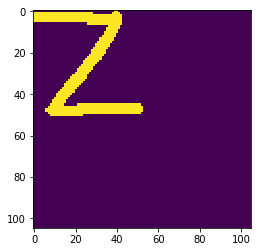

In [63]:
#@title Sample Latin Images { run: "auto" }
import matplotlib.pyplot as plt

character = 16 #@param {type:"slider", min:0, max:25, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(latin_samples[character])

***These sample latin images will be used for testing distance functions. ***

# Greek Images


In [15]:

greek_path = "Greek"
#latin_path_evaluation = "images_evaluation"

print("Loading Latin alphabet..")
greek = load_images_from_directory(greek_path)
print(greek.shape)

Loading Latin alphabet..
(24, 20, 105, 105)


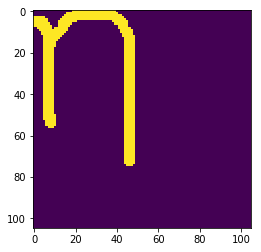

In [16]:
#@title Greek Images { run: "auto" }
import matplotlib.pyplot as plt

character = 0 #@param {type:"slider", min:0, max:25, step:1}
drawing = 0 #@param {type:"slider", min:0, max:19, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(greek[character,drawing])

In [0]:
# Extract samples from latin alphabet
greek_samples, new_greek = get_sample(greek)

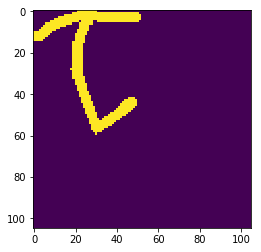

In [62]:
#@title Sample Greek Images { run: "auto" }
import matplotlib.pyplot as plt

character = 16 #@param {type:"slider", min:0, max:23, step:1}
#image_set = 'Xtrain' #@param ["Xval", "Xtrain"]
plt.imshow(greek_samples[character])

# Experiments


---


*In this section,  there are experiments of distance functions for one-shot learning . Follow the headers for distance functions properties.*



---



## Elementary Distance Functions





---
* Minkowski Family
> *   Euclidean 
> *   Manhattan
> *  LP Norm Distance Function

* Angular Distance Functions
>* Cosine Similarity

>### Euclidean
---
Euclidean distance is a special case of Minkowski distance with $\lambda=2$

$Euclidean(\vec{x}, \vec{y}):= \sqrt{\sum_i(x_i-y_i)^2}$


In [0]:
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
import math

def mins_helper(arr):
    
    indexed_used = []
    for i in range(len(arr)):

        row_min = np.argmin(arr[i])
        if row_min in indexed_used:
            new_row = arr[i]
            new_row[row_min] = 999
            row_min = np.argmin(new_row)     
        
        indexed_used.append(row_min)
    
    return indexed_used

def euclidean_distance_std(img1,img2):
    """
        params: x and y images
        
        To apply eucl. distance It transforms images to 1D vectors by flatten()
        
        return: euclidean distance between two images
       
    """
    
    
    v1 = img1.flatten()
    v2 = img2.flatten()
    
    return distance.euclidean(v1, v2)


    
    
def euclidean_distance_modified(img1,img2):
    """
        params: img1 and img2 images
        
        It extracts each black pixels from images, find their coordinates on
        x-y plane by taking origin as a reference.
        
        Then, computes distance between all pixel pairs and sums minimum
        distance along axis=1 (row based).
        
        can be normalized, divides with biggest distance on the plane
        diagonal sqrt(max_x**2+max_y**2)
        
        returns: modified euclidean distance
        
    """
    max_x, max_y = img1.shape
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    #print("black pixel count of img1: ", v1.shape )
    
    #print("black pixel count of img1: ", v2.shape )
    
    # Number of black pixels is not same for every image pair.
    
    # Randomly select black pixels from larger one
    randoms = np.random.permutation(min(len(v1), len(v2)))
    
    if len(v1) < len(v2) :
        v2 = v2[randoms[:]]
    else:
        v1 = v1[randoms[:]]
    
    
    dist = distance.cdist(v1,v2,'euclidean')
    
    difference_sum = np.mean(np.amin(dist,axis=1))
    
    return difference_sum

def euclidean_distance_modified_v2(img1,img2):
    """
        params: img1 and img2 images
        
        It extracts each black pixels from images, find their coordinates on
        x-y plane by taking origin as a reference.
        
        Then, computes distance between all pixel pairs and sums minimum
        distance along axis=1 (row based).
        
        can be normalized, divides with biggest distance on the plane
        diagonal sqrt(max_x**2+max_y**2)
        
        returns: modified euclidean distance
        
    """
    max_x, max_y = img1.shape
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    
    # Number of black pixels is not same for every image pair.
    
    # Randomly select black pixels from larger one
    randoms = np.random.permutation(min(len(v1), len(v2)))
    
    if len(v1) < len(v2) :
        v2 = v2[randoms[:]]
    else:
        v1 = v1[randoms[:]]
    
    
    dist = distance.cdist(v1,v2,'euclidean')
    
    d = mins_helper(dist)
    sum = 0
    for i in range(len(dist)):
        sum += dist[i,d[i]]
    return sum/len(dist)

### Manhattan
---
Manhattan distance is a special case of Minkowski distance with $\lambda=1$

$Manhattan(\vec{x}, \vec{y}):= \sqrt{\sum\limits_i |x_i-y_i|}$

Since flatten function is used, standard manhattan distance can be deceptive.

A modified Manhattan distance will be more informative}.

In [0]:
def manhattan_distance_std(img1,img2):
    """
        params: img1 and img2 images
        
        To apply eucl. distance It transforms images to 1D vectors by flatten()
        
        return: euclidean distance between two images
       
    """
    
    
    v1 = img1.flatten()
    v2 = img2.flatten()
    
    return distance.cityblock(v1, v2)

def manhattan_distance_modified(img1,img2):
    """
        params: images
        
        Like modified euclidean, finds coordinates of black pixels, then
        computes distance.
        
        
        return manhattan distance between two images
    """
    max_x, max_y = img1.shape
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    # Number of black pixels is not same for every image pair.
    
    # Randomly select black pixels from larger one
    randoms = np.random.permutation(min(len(v1), len(v2)))
    
    if len(v1) < len(v2) :
        v2 = v2[randoms[:]]
    else:
        v1 = v1[randoms[:]]
    
    
    dist = distance.cdist(v1,v2,'cityblock')
    
    difference_sum = np.sum(np.amin(dist,axis=1))/len(dist)
    
    return difference_sum

### Cosine Similarity

$CosineSimilarity(\vec{x} , \vec{y}) =\dfrac{\vec{x}.\vec{y}}{||a||.||b||} $


In [0]:
def cosine_distance_std(img1, img2):
    
    v1 = img1.flatten()
    v2 = img2.flatten()
    
    return distance.cosine(v1, v2)


def arccos_distance(img1,img2):
    
    cos_sim = 1 - cosine_distance_std(img1,img2)
    
    return (math.acos(cos_sim))


### Dynamic Time Warping

In [0]:
#Dynamic Time Warping implementation
from fastdtw import fastdtw

def dtw(img1,img2):
    dist,path = fastdtw(img1,img2,dist = distance.jaccard)
    
    return dist

### Canberra Distance

In [0]:
def canberra_distance_std(img1, img2):
    v1 = img1.flatten()
    v2 = img2.flatten()
    
    return distance.canberra(v1, v2)

def canberra_distance_modified(img1, img2):
    max_x, max_y = img1.shape
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    # Number of black pixels is not same for every image pair.
    
    # Randomly select black pixels from larger one
    randoms = np.random.permutation(min(len(v1), len(v2)))
    
    if len(v1) < len(v2) :
        v2 = v2[randoms[:]]
    else:
        v1 = v1[randoms[:]]
    
    
    dist = distance.cdist(v1,v2,'canberra')
    
    difference_sum = np.sum(np.amin(dist,axis=1))/len(dist)
    
    return difference_sum

In [0]:
def distance_wrt_origin(img1,img2,distance_function):
    """
      Calculates distance with respect to origin based on distance_function
      
      Extracts black pixels and calculate its coordinates, then sum distance to origin
      
      return both of the distances in a tuple like (v1_sum, v2_sum)
      
    """
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    max_x, max_y = img1.shape
    
    v1 = black_pixels(img1)
    v2 = black_pixels(img2)
    
    # Number of black pixels is not same for every image pair.
    
    # Randomly select black pixels from larger one
    randoms = np.random.permutation(min(len(v1), len(v2)))
    
    if len(v1) < len(v2) :
        v2 = v2[randoms[:]]
    else:
        v1 = v1[randoms[:]]
    
    v1_sum = np.sum(distance.cdist(v1,[[0,0]], distance_function))
    v2_sum = np.sum(distance.cdist(v2,[[0,0]], distance_function))
    
    
    return v1_sum,v2_sum

## Distance Functions Experiment Suite

standard euclidean distance:  37.66961640367472
modified euclidean distance:  8.622787870356582
modified euclidean distance_v2:  8.801111217793915
standard manhattan distance:  1419.0
modified manhattan distance:  9.556569343065693
cosine similarity:  0.8838232957490403
arccos similarity:  1.4543566823710603
standard canberra distance:  1419.0
modified canberra distance:  0.1894107433222829
dtw trial:  72.07974549063516
Scores... img1: 23266.312185272964 and img2: 19340.787209224334 


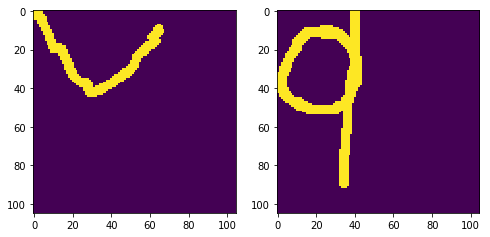

In [25]:
#@title  { run: "auto" }
#@markdown Select characters and drawings to compute distances.



character1 = 4 #@param {type:"slider", min:0, max:25, step:1}
drawing1 = 2 #@param {type:"slider", min:0, max:19, step:1}

character2 = 25 #@param {type:"slider", min:0, max:25, step:1}
drawing2 = 0 #@param {type:"slider", min:0, max:18, step:1}

img1 = new_latin[character1,drawing1]
img2 = new_latin[character2,drawing2]

#print(latin.shape)

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1)
fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img2)


print("standard euclidean distance: ", euclidean_distance_std(img1,img2))
print("modified euclidean distance: ", euclidean_distance_modified(img1,img2))
print("modified euclidean distance_v2: ", euclidean_distance_modified_v2(img1,img2))
print("standard manhattan distance: ",manhattan_distance_std(img1,img2))
print("modified manhattan distance: ", manhattan_distance_modified(img1,img2))
print("cosine similarity: ",cosine_distance_std(img1,img2))
print("arccos similarity: ", arccos_distance(img1,img2))
print("standard canberra distance: ", canberra_distance_std(img1,img2))
print("modified canberra distance: ", canberra_distance_modified(img1,img2))

print("dtw trial: ", dtw(img1, img2))

v1_sum, v2_sum = distance_wrt_origin(img1,img2,"euclidean")
print("Scores... img1: {0} and img2: {1} ".format(v1_sum,v2_sum))





###Testing

Clasiffication runs according to basic non-parametric distance functions

In [0]:
import timeit

def classification_run(train_set, test_set, f_cost, ftype='cost'):
    # Compute error rate for one run of one-shot classification
    #  n_test : number of unclassified images
    #  n_train: number of labeled images
    #  f_cost : f_cost(itemA,itemB) should compute similarity between two images, using output of f_load
    #  ftype  : 'cost' if small values from f_cost mean more similar, or 'score' if large values are more similar
    #
    # Output
    #  perror : percent errors (0 to 100% error)
    # 
    
    
    n_train = train_set.shape[0]
    n_test_class, n_test_instances = test_set.shape[0:2]
    
    costs = np.zeros((n_test_class,n_test_instances,n_train))
    
    for i in range(n_test_class):
        start = timeit.default_timer()
        for k in range(n_test_instances):
            for c in range(n_train):
                costs[i,k,c] = f_cost(test_set[i,k],train_set[c])
        stop = timeit.default_timer()
        
        print("Test class: {0}/{2} completed. Time: {1} sec. Estimated remaining time: {3} sec".format(i+1, stop - start, n_test_class, (stop-start)*(n_test_class-i-1)))
    
    #print( costs[0])
    #print(np.argmin(costs[0],axis=1))
    
    if ftype == 'cost':
        predicted_class = []
        for i in range(n_test_class):
            predicted_class.append(np.argpartition(costs[i],2,axis=1))
        
    elif ftype == 'score':
        predicted_class = []
        for i in range(n_test_class):
            predicted_class.append(np.argmax(costs[i],axis=1))
    else:
        assert False
    
    correct = 0.0
    #print(predicted_class)
    class_scores = [0.0 for i in range(n_test_class)]
    
    correct2 = 0.0
    class_scores2 = [0.0 for i in range(n_test_class)]

    correct3 = 0.0
    class_scores3 = [0.0 for i in range(n_test_class)]

    for i in range(n_test_class):
        for j in range(n_test_instances):
            if predicted_class[i][j][0] == i:
                correct += 1
                class_scores[i] += 1
                
            if predicted_class[i][j][0] == i or predicted_class[i][j][1] == i:
                """plt.subplot(1,2,1)
                plt.imshow(test_set[i,j])
                plt.subplot(1,2,2)
                plt.imshow(train_set[i])"""
                correct2 += 1
                class_scores2[i] += 1
                
            if predicted_class[i][j][0] == i or predicted_class[i][j][1] == i or predicted_class[i][j][2]==i:
                correct3 += 1
                class_scores3[i] += 1
            
    
    for i in range(n_test_class):
        print(" Class {0} : Top1 correct: {1}/{2}, Top2 correct: {3}/{2}, Top3 correct: {4}/{2}".format(i,class_scores[i], n_test_instances,class_scores2[i],class_scores3[i]))
    
    print("Total: Top1 -: {0}/{1} = {4}, Top2 -: {2}/{1} = {5}, Top3 -: {3}/{1} = {6}".format(correct,n_test_class * n_test_instances,correct2,correct3,100 * correct / (n_test_class * n_test_instances), \
                                                                                             100 * correct2 / (n_test_class * n_test_instances),100 * correct3 / (n_test_class * n_test_instances)))
    pcorrect = 100 * correct / (n_test_class * n_test_instances)
    perror = 100 - pcorrect
    
    return pcorrect
    

In [27]:
print(classification_run(latin_samples, new_latin, manhattan_distance_modified))

Test class: 1/26 completed. Time: 18.121147707999967 sec. Estimated remaining time: 453.02869269999917 sec


KeyboardInterrupt: ignored

In [0]:
def classification_run_combined(train_set, test_set, ftype='cost'):
    # Compute error rate for one run of one-shot classification
    #  n_test : number of unclassified images
    #  n_train: number of labeled images
    #  f_cost : f_cost(itemA,itemB) should compute similarity between two images, using output of f_load
    #  ftype  : 'cost' if small values from f_cost mean more similar, or 'score' if large values are more similar
    #
    # Output
    #  perror : percent errors (0 to 100% error)
    # 
    
    
    n_train = train_set.shape[0]
    n_test_class, n_test_instances = test_set.shape[0:2]
    
    costs_1 = np.zeros((n_test_class,n_test_instances,n_train))
    costs_2 = np.zeros((n_test_class,n_test_instances,n_train))
    costs_3 = np.zeros((n_test_class,n_test_instances,n_train))

    for i in range(n_test_class):
        start = timeit.default_timer()
        for k in range(n_test_instances):
            for c in range(n_train):
                costs_1[i,k,c] = euclidean_distance_std(test_set[i,k],train_set[c])
                costs_2[i,k,c] = cosine_distance_std(test_set[i,k], train_set[c])
                costs_3[i,k,c] = dtw(test_set[i,k],train_set[c],distance.euclidean)
        stop = timeit.default_timer()
        
        print("Test class: {0}/{2} completed. Time: {1} sec. Estimated remaining time: {3} sec".format(i+1, stop - start, n_test_class, (stop-start)*(n_test_class-i-1)))
    
    #print( costs[0])
    #print(np.argmin(costs[0],axis=1))
    
    if ftype == 'cost':
        predicted_class = []
        predicted_class2 = []
        predicted_class3 = []
        for i in range(n_test_class):
            predicted_class.append(np.argpartition(costs_1[i],1,axis=1))
            predicted_class2.append(np.argpartition(costs_2[i],1,axis=1))
            predicted_class3.append(np.argpartition(costs_3[i],1,axis=1))
        
    elif ftype == 'score':
        predicted_class = []
        for i in range(n_test_class):
            predicted_class.append(np.argmax(costs[i],axis=1))
    else:
        assert False
    
    correct = 0.0
    #print(predicted_class)
    class_scores = [0.0 for i in range(n_test_class)]
    flag=0
    for i in range(n_test_class):
        for j in range(n_test_instances):
            votes = np.zeros((n_test_class), dtype= int)
            votes[predicted_class[i][j][0]]  += 1
            votes[predicted_class2[i][j][0]] += 1
            votes[predicted_class3[i][j][0]] += 1
            if np.argmax(votes) == i:
                correct += 1
                class_scores[i] += 1
            if flag: 
                flag -= 1
                print(votes)
            
    
    for i in range(n_test_class):
        print(" Class {0} : Top1 correct: {1}/{2}".format(i,class_scores[i], n_test_instances))
    
    print("Total: Top1 -: {0}/{1} = {2}".format(correct,n_test_class * n_test_instances,100 * correct / (n_test_class * n_test_instances)))
    pcorrect = 100 * correct / (n_test_class * n_test_instances)
    perror = 100 - pcorrect
    
    return pcorrect

    
    

In [0]:
import timeit

def classification_run_combined2(train_set, test_set, f_cost, ftype='cost'):
    # Compute error rate for one run of one-shot classification
    #  n_test : number of unclassified images
    #  n_train: number of labeled images
    #  f_cost : f_cost(itemA,itemB) should compute similarity between two images, using output of f_load
    #  ftype  : 'cost' if small values from f_cost mean more similar, or 'score' if large values are more similar
    #
    # Output
    #  perror : percent errors (0 to 100% error)
    # 
    
    
    n_train = train_set.shape[0]
    n_test_class, n_test_instances = test_set.shape[0:2]
    
    costs = np.zeros((n_test_class,n_test_instances,n_train))
    
    for i in range(n_test_class):
        start = timeit.default_timer()
        for k in range(n_test_instances):
            for c in range(n_train):
                costs[i,k,c] = 
        stop = timeit.default_timer()
        
        print("Test class: {0}/{2} completed. Time: {1} sec. Estimated remaining time: {3} sec".format(i+1, stop - start, n_test_class, (stop-start)*(n_test_class-i-1)))
    
    #print( costs[0])
    #print(np.argmin(costs[0],axis=1))
    
    if ftype == 'cost':
        predicted_class = []
        for i in range(n_test_class):
            predicted_class.append(np.argpartition(costs[i],2,axis=1))
        
    elif ftype == 'score':
        predicted_class = []
        for i in range(n_test_class):
            predicted_class.append(np.argmax(costs[i],axis=1))
    else:
        assert False
    
    correct = 0.0
    #print(predicted_class)
    class_scores = [0.0 for i in range(n_test_class)]
    
    correct2 = 0.0
    class_scores2 = [0.0 for i in range(n_test_class)]

    correct3 = 0.0
    class_scores3 = [0.0 for i in range(n_test_class)]

    for i in range(n_test_class):
        for j in range(n_test_instances):
            if predicted_class[i][j][0] == i:
                correct += 1
                class_scores[i] += 1
                
            if predicted_class[i][j][0] == i or predicted_class[i][j][1] == i:
                """plt.subplot(1,2,1)
                plt.imshow(test_set[i,j])
                plt.subplot(1,2,2)
                plt.imshow(train_set[i])"""
                correct2 += 1
                class_scores2[i] += 1
                
            if predicted_class[i][j][0] == i or predicted_class[i][j][1] == i or predicted_class[i][j][2]==i:
                correct3 += 1
                class_scores3[i] += 1
            
    
    for i in range(n_test_class):
        print(" Class {0} : Top1 correct: {1}/{2}, Top2 correct: {3}/{2}, Top3 correct: {4}/{2}".format(i,class_scores[i], n_test_instances,class_scores2[i],class_scores3[i]))
    
    print("Total: Top1 -: {0}/{1} = {4}, Top2 -: {2}/{1} = {5}, Top3 -: {3}/{1} = {6}".format(correct,n_test_class * n_test_instances,correct2,correct3,100 * correct / (n_test_class * n_test_instances), \
                                                                                             100 * correct2 / (n_test_class * n_test_instances),100 * correct3 / (n_test_class * n_test_instances)))
    pcorrect = 100 * correct / (n_test_class * n_test_instances)
    perror = 100 - pcorrect
    
    return pcorrect
    

In [76]:
print(classification_run_combined2(latin_samples, new_latin,euclidean_distance_modified))

Test class: 1/26 completed. Time: 0.08837940700004765 sec. Estimated remaining time: 2.2094851750011912 sec
Test class: 2/26 completed. Time: 0.08249921600008747 sec. Estimated remaining time: 1.9799811840020993 sec
Test class: 3/26 completed. Time: 0.08146838099992237 sec. Estimated remaining time: 1.8737727629982146 sec
Test class: 4/26 completed. Time: 0.0886513760001435 sec. Estimated remaining time: 1.950330272003157 sec
Test class: 5/26 completed. Time: 0.09101032400030817 sec. Estimated remaining time: 1.9112168040064716 sec
Test class: 6/26 completed. Time: 0.07078740899987679 sec. Estimated remaining time: 1.4157481799975358 sec
Test class: 7/26 completed. Time: 0.07879404200002682 sec. Estimated remaining time: 1.4970867980005096 sec
Test class: 8/26 completed. Time: 0.07118738100007249 sec. Estimated remaining time: 1.2813728580013048 sec
Test class: 9/26 completed. Time: 0.0739489389998198 sec. Estimated remaining time: 1.2571319629969366 sec
Test class: 10/26 completed. Ti

In [0]:
print(classification_run_combined2(latin_samples, new_latin,euclidean_distance_modified))

In [0]:
print(classification_run_combined(latin_samples, new_latin))

In [0]:
print(classification_run(greek_samples, new_greek, manhattan_distance_modified))

In [0]:
print(classification_run(latin_samples,new_latin,euclidean_distance_std))